 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Dataset" data-toc-modified-id="Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#First-look-at-data" data-toc-modified-id="First-look-at-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>First look at data</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Head" data-toc-modified-id="Head-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Head</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Summary" data-toc-modified-id="Summary-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Missing-values" data-toc-modified-id="Missing-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Missing values</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Conclusion" data-toc-modified-id="Conclusion-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Exploration" data-toc-modified-id="Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploration</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Distribution-of-age" data-toc-modified-id="Distribution-of-age-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distribution of age</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Observation" data-toc-modified-id="Observation-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Observation</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Distribution-of-survival" data-toc-modified-id="Distribution-of-survival-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distribution of survival</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Observation" data-toc-modified-id="Observation-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Observation</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Distribution-of-passengers-amongst-classes" data-toc-modified-id="Distribution-of-passengers-amongst-classes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Distribution of passengers amongst classes</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Observation" data-toc-modified-id="Observation-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Observation</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Distribution-of-age-within-each-Class" data-toc-modified-id="Distribution-of-age-within-each-Class-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Distribution of age within each Class</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Observation" data-toc-modified-id="Observation-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Observation</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Distribution-of-age-within-each-gender" data-toc-modified-id="Distribution-of-age-within-each-gender-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Distribution of age within each gender</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Observation" data-toc-modified-id="Observation-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Observation</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Feature-transformations" data-toc-modified-id="Feature-transformations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature transformations</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Add-HasFamily" data-toc-modified-id="Add-HasFamily-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Add HasFamily</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Add-IsPclassUpper" data-toc-modified-id="Add-IsPclassUpper-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Add IsPclassUpper</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Add-AgeDecade" data-toc-modified-id="Add-AgeDecade-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Add AgeDecade</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Post-transformed-data" data-toc-modified-id="Post-transformed-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Post-transformed data</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Questions" data-toc-modified-id="Questions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Questions</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Does-age-influence-your-survival-chances?" data-toc-modified-id="Does-age-influence-your-survival-chances?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Does age influence your survival chances?</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Conclusion" data-toc-modified-id="Conclusion-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Is-the-survival-rate-of-men-&amp;-women-disproprotionate?" data-toc-modified-id="Is-the-survival-rate-of-men-&amp;-women-disproprotionate?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Is the survival rate of men &amp; women disproprotionate?</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Conclusion" data-toc-modified-id="Conclusion-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Does-being-in-the-upper-socio-economic-status-(SES)-increase-survival-chances,-because-of-some-additional-privileges/facilities-given-to-them?" data-toc-modified-id="Does-being-in-the-upper-socio-economic-status-(SES)-increase-survival-chances,-because-of-some-additional-privileges/facilities-given-to-them?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Does being in the upper socio-economic status (SES) increase survival chances, because of some additional privileges/facilities given to them?</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Conclusion" data-toc-modified-id="Conclusion-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Are-survival-rates-of-females-(which-we-established-were-higher-than-males)-similar-between-upper-and-non-upper-class-passengers?" data-toc-modified-id="Are-survival-rates-of-females-(which-we-established-were-higher-than-males)-similar-between-upper-and-non-upper-class-passengers?-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Are survival rates of females (which we established were higher than males) similar between upper and non-upper class passengers?</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Conclusion" data-toc-modified-id="Conclusion-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Does-being-alone-increase-your-chance-of-survival?" data-toc-modified-id="Does-being-alone-increase-your-chance-of-survival?-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Does being alone increase your chance of survival?</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Conclusion" data-toc-modified-id="Conclusion-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#What-was-the-survival-rate-of-people-with-children?-What-if-you-had-a-sibling?" data-toc-modified-id="What-was-the-survival-rate-of-people-with-children?-What-if-you-had-a-sibling?-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>What was the survival rate of people with children? What if you had a sibling?</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Conclusion" data-toc-modified-id="Conclusion-6.7.1"><span class="toc-item-num">6.7.1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Conclusion" data-toc-modified-id="Conclusion-6.7.2"><span class="toc-item-num">6.7.2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Did-female-siblings-survive-more-than-male-siblings?" data-toc-modified-id="Did-female-siblings-survive-more-than-male-siblings?-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Did female siblings survive more than male siblings?</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Conclusion" data-toc-modified-id="Conclusion-6.8.1"><span class="toc-item-num">6.8.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Final-Conclusion" data-toc-modified-id="Final-Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final Conclusion</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Limitations" data-toc-modified-id="Limitations-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Limitations</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Total-no.-of-observations" data-toc-modified-id="Total-no.-of-observations-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Total no. of observations</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#No.-of-children,-No.-of-parents-separetely" data-toc-modified-id="No.-of-children,-No.-of-parents-separetely-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>No. of children, No. of parents separetely</a></span></li><li><span><a href="http://localhost:8888/notebooks/Analysis.ipynb#Missing-observations-on-Age" data-toc-modified-id="Missing-observations-on-Age-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Missing observations on Age</a></span></li></ul></li></ul></li></ul></div>

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

%matplotlib inline

## Dataset

In [110]:
titanic = pd.read_csv('./titanic-data.csv')

## First look at data

### Head

In [111]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Summary

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing values

In [210]:
# You'll see this code pattern throughout the notebook. I save the
# plot object in a variable, which allows me to set labelling for the plot.
# I refactored this into a function to keep the notebook short.
def plot_with_labels(plot, xlabel=None, ylabel=None, legend=None, title=None):
    if title is not None:
        plot.set_title(title)
    
    if xlabel is not None:
        plot.set_xlabel(xlabel)

    if ylabel is not None:
        plot.set_ylabel(ylabel)
        
    if legend is not None:
        plot.legend(legend)
    
    return plot

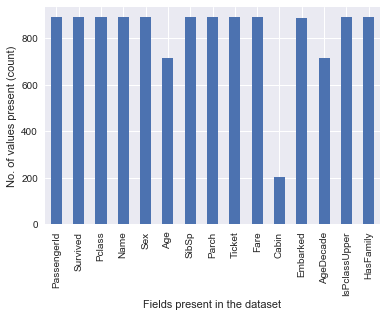

In [204]:
plot_with_labels(
    titanic.count().plot(kind='bar'),
    xlabel='Fields present in the dataset',
    ylabel='No. of values present (count)'
)

In [112]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Cabin has 687 missing values. It's difficult to perform any analysis using this column.
1. Age has 177 missing values. But the majority of the data do have values, and we can perform some analysis.
1. Embarked has only 2 missing values. This column can be used for analysis.

#### Conclusion

1. I'll use the remaining values of Age in my analysis, while not taking into account the NAs. We have 714 values for Age, which I consider enough to give a statistical insight, and we'll base all the analysis only on those 714 values. Wherever age is analysed, we'll only consider rows where age is present.
1. I will not be using Cabin for analysis, since it has 687 missing values, and there is not enough data to be of statistical significance.
1. Embarked can still be used for analysis. The two missing values will be ignored from all the analyses, and we'll only work with 889 values.

## Exploration

### Distribution of age

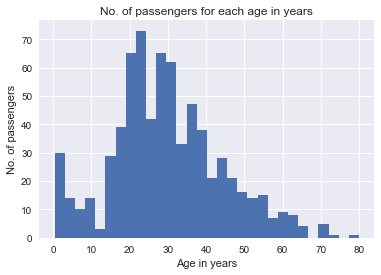

In [234]:
plot_with_labels(
    titanic[titanic['Age'].notnull()]['Age'].plot(kind='hist', bins=30),
    xlabel='Age in years',
    ylabel='No. of passengers',
    title='No. of passengers for each age in years'
)

#### Observation

1. We observe a lot of middle-aged people.
1. The distribution is positively skewed. Thus the majority of the crowd are at the younger side of the distribution.

### Distribution of survival

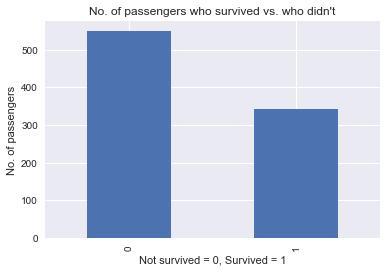

In [235]:
plot_with_labels(
    titanic.groupby('Survived').agg({'Survived': 'count'}).plot(kind='bar'),
    xlabel='Not survived = 0, Survived = 1',
    ylabel='No. of passengers',
    legend='',
    title='No. of passengers who survived vs. who didn\'t'
)

In [139]:
titanic.groupby('Survived').agg({'Survived': 'count'})

,Survived
Survived,
0,549
1,342


#### Observation

1. There are more non-survivors (549) than survivors (342).

### Distribution of passengers amongst classes

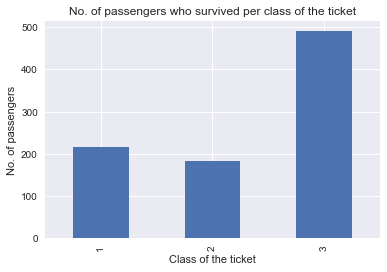

In [236]:
plot_with_labels(
    titanic.groupby('Pclass').agg({'Pclass': 'count'}).plot(kind='bar'),
    xlabel='Class of the ticket',
    ylabel='No. of passengers',
    legend='',
    title='No. of passengers who survived per class of the ticket'
)

In [141]:
titanic.groupby('Pclass').agg({'Pclass': 'count'})

,Pclass
Pclass,
1,216
2,184
3,491


#### Observation

1. Class 2 has the lowest number of passengers
1. Bulk of the passengers are from Class 3

### Distribution of age within each Class

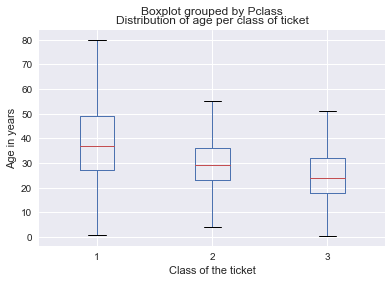

In [238]:
plot_with_labels(
    titanic[titanic['Age'].notnull()].boxplot(column='Age', by='Pclass'),
    title='Distribution of age per class of ticket',
    xlabel='Class of the ticket',
    ylabel='Age in years'
)

#### Observation

1. 75% of the Class 1 passengers have an age >= 28 years. Class 1 passengers have the highest median age.
1. Class 2 passengers have a median age less than Class 1 but more than Class 2.
1. Class 3 passengers have the lowest median age.

There is a correlation between Pclass and Age of the passengers. If Pclass is assumed to represent the purchasing power of the passengers, then we can say that there is a correlation between Age and Wealth of the passengers.

### Distribution of age within each gender

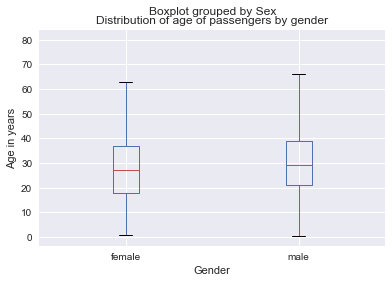

In [239]:
plot_with_labels(
    titanic[titanic['Age'].notnull()].boxplot(column='Age', by='Sex'),
    title='Distribution of age of passengers by gender',
    xlabel='Gender',
    ylabel='Age in years'
)

#### Observation

1. Men have a higher median age than females.
1. Although there appears to be no one below the age of 15, we do have 177 Age records missing.

## Feature transformations

Additional features would go here as additional columns. This section is placed higher so that the new columns can be used by any code below.

### Add HasFamily

Combining Parch and SibSp, let's create a new variable HasFamily which will be True if either Parch or SibSp has a value greater than 0

In [182]:
titanic['HasFamily'] = (titanic['SibSp'] > 0) | (titanic['Parch'] > 0)

### Add IsPclassUpper

This column would indicate if Pclass has a value of 1.

In [181]:
titanic['IsPclassUpper'] = (titanic['Pclass'] == 1)

### Add AgeDecade

Right now, age is a continuous variable. We'll add a new column called "AgeDecade" where we group ages in bins of 10 years. For example:

1. 0 to 9 would have AgeDecade value 0
1. 10 to 19 would have a value of 1
1. Basically, the formula is floor(Age/10)

In [167]:
titanic['AgeDecade'] = np.floor(titanic['Age'].divide(10.0))

## Post-transformed data

A view of the data post all transformations.

In [168]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeDecade
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0


## Questions

Let's tackle all the questions one by one. As I went ahead with the analysis, I added more questions to the notebook at the right places. I've tried to make all the plots and summaries answer some or the other question.

Bear in mind that in Python, booleans are (True == 1 and False == 0). **Also, just for this dataset, since "Survived" is marked as 1 for survived, and 0 for not survived, the mean of this variable will give the proportion of survived people. This is just a programming trick.**

In [8]:
True == 1

True

In [9]:
False == 0

True

### Does age influence your survival chances?

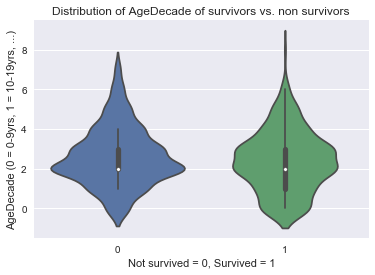

In [240]:
plot_with_labels(
    sns.violinplot(x=titanic['Survived'], y=titanic['AgeDecade']),
    xlabel='Not survived = 0, Survived = 1',
    ylabel='AgeDecade (0 = 0-9yrs, 1 = 10-19yrs, ...)',
    title='Distribution of AgeDecade of survivors vs. non survivors'
)

In [171]:
titanic.groupby('AgeDecade').agg({'Survived': ['count', 'sum', 'mean']})

Survived              
             count sum      mean
AgeDecade                       
0.0             62  38  0.612903
1.0            102  41  0.401961
2.0            220  77  0.350000
3.0            167  73  0.437126
4.0             89  34  0.382022
5.0             48  20  0.416667
6.0             19   6  0.315789
7.0              6   0  0.000000
8.0              1   1  1.000000

#### Conclusion

1. The survival rate is highest for children (ages 0 to 9).
1. Then, it remains close to 40%, except for when it drops by 10% for people in their 60s.

### Is the survival rate of men & women disproprotionate?

Did people of a particular gender survive more than the other?

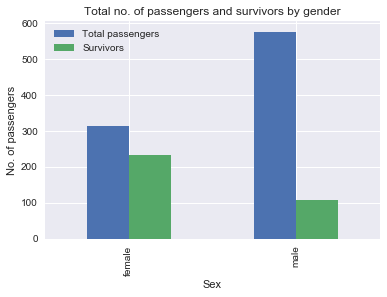

In [244]:
plot_with_labels(
    titanic.groupby('Sex').agg({'Survived': ['count', 'sum']}).plot(kind='bar'),
    ylabel='No. of passengers',
    legend=['Total passengers', 'Survivors'],
    title='Total no. of passengers and survivors by gender'
)

More males were onboard than females. As we see below, women comprised of about 35%. However, we also observe the following two facts:

1. The absolute number of female survivors is greater than the absolute number of male survivors. This is despite males comprising of 65% of the people onboard.
1. The proportion of females surviving is greater than males. We'll look into proportions in the next graph.

In [83]:
male_vs_female_count = titanic[['PassengerId', 'Sex']].groupby('Sex').agg(['count'])
male_vs_female_count['proportion'] = male_vs_female_count['PassengerId'] / male_vs_female_count.sum()['PassengerId']

male_vs_female_count

,PassengerId,proportion
,count,
Sex,,
female,314,0.352413
male,577,0.647587


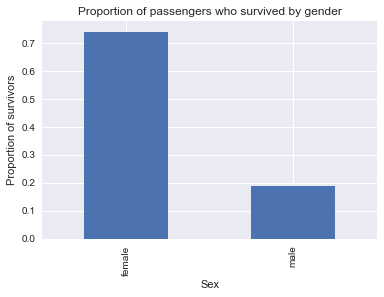

In [243]:
plot_with_labels(
    titanic.groupby('Sex').agg({'Survived': ['mean']}).plot(kind='bar'),
    ylabel='Proportion of survivors',
    legend='',
    title='Proportion of passengers who survived by gender'
)

In [84]:
titanic.groupby('Sex').agg({'Survived': ['mean']})

,Survived
,mean
Sex,
female,0.742038
male,0.188908


#### Conclusion

As we can see, 74% of the women survived, while only 18% of the men survived. Considering the fact that women also had larger absolute numbers than the men who survived, there is a strong possibility of external influence. People could have helped women and children get to safety first.

However, we've only established a correlation, not causation.

### Does being in the upper socio-economic status (SES) increase survival chances, because of some additional privileges/facilities given to them?

Since Pclass is a categorical variable (0,1,2), I added a new column "IsPclassUpper" which is True for Pclass=1, and False otherwise.

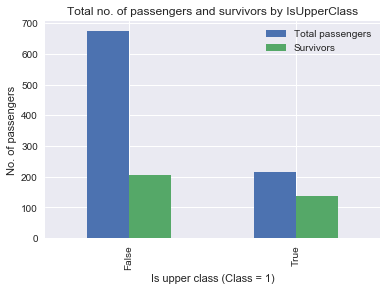

In [245]:
plot_with_labels(
    titanic.groupby('IsPclassUpper').agg({'Survived': ['count', 'sum']}).plot(kind='bar'),
    xlabel='Is upper class (Class = 1)',
    ylabel='No. of passengers',
    legend=['Total passengers', 'Survivors'],
    title='Total no. of passengers and survivors by IsUpperClass'
)

It is not surprising that there are less upper class people on board than their counterparts. The following things are visible:

1. The absolute number of non-upper class survivors are more than the upper class. This is in contrast to the gender case. Thus, I couldn't draw any signficant conclusion just on this factor.
1. The proportion of upper class survivors looks more than 50%, while the non-upper class is very low. I'll analyse the exact proportions in the next plot.

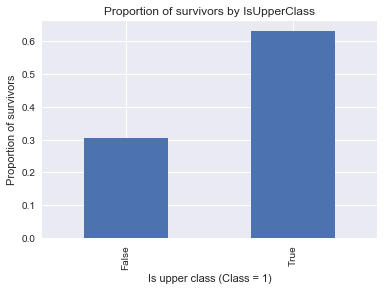

In [246]:
plot_with_labels(
    titanic.groupby('IsPclassUpper').agg({'Survived': ['mean']}).plot(kind='bar'),
    xlabel='Is upper class (Class = 1)',
    ylabel='Proportion of survivors',
    legend='',
    title='Proportion of survivors by IsUpperClass'
)

In [92]:
titanic.groupby('IsPclassUpper').agg({'Survived': ['mean']})

,Survived
,mean
IsPclassUpper,
False,0.305185
True,0.629630


Not surprisingly, almost 63% of the upper class people survived. Only 30% of the non-upper class people survived.

#### Conclusion

We observe a positive correlation between being upper class and survival. Causation is not implied, only correlation. With more domain knowledge, we can pin-point if there's a causation.

### Are survival rates of females (which we established were higher than males) similar between upper and non-upper class passengers?

This question is to further investigate the effect of gender. By looking at both SES and gender, we see if the people of the same gender received similar treatments regardless of SES.

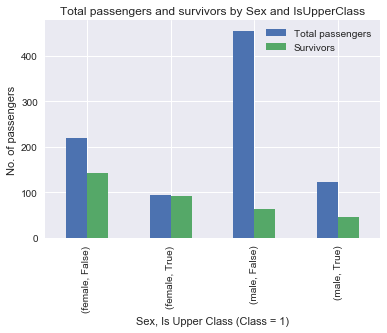

In [247]:
plot_with_labels(
    titanic.groupby(['Sex', 'IsPclassUpper']).agg({'Survived': ['count', 'sum']}).plot(kind='bar'),
    xlabel='Sex, Is Upper Class (Class = 1)',
    ylabel='No. of passengers',
    legend=['Total passengers', 'Survivors'],
    title='Total passengers and survivors by Sex and IsUpperClass'
)

The observations are curious:

1. Almost all female upper class people seem to have survived.
1. The absolute no. of upper class survivors are less than the non-upper class counterparts. This was a bit surprising.

Let's look at the proportions more closely.

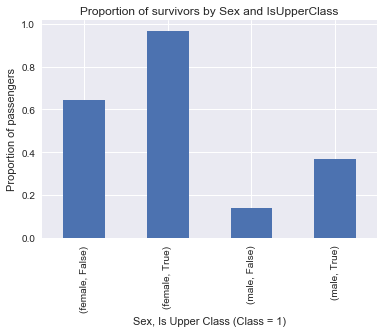

In [248]:
plot_with_labels(
    titanic.groupby(['Sex', 'IsPclassUpper']).agg({'Survived': ['mean']}).plot(kind='bar'),
    xlabel='Sex, Is Upper Class (Class = 1)',
    ylabel='Proportion of passengers',
    legend='',
    title='Proportion of survivors by Sex and IsUpperClass'
)

In [95]:
titanic.groupby(['Sex', 'IsPclassUpper']).agg({'Survived': ['mean']})

Survived
                          mean
Sex    IsPclassUpper          
female False          0.645455
       True           0.968085
male   False          0.140659
       True           0.368852

#### Conclusion

1. More females survived in both SES.
1. The survival of females in the upper class is spectacularly high.
1. Although proportion of upper class men who survived is more than the non-upper class men, the absolute numbers are comparable. It seems that being upper class didn't give men any distinct advantage for survival.

### Does being alone increase your chance of survival?

There are two hypotheses here:
1. Being alone, you could have a better chance of survival because you don't have to wait for anyone else.
1. However, if you have someone you're depending on, he might have helped you at the cost of his life. This depends on the nature of the relationship.
1. Since the dataset provides a Parch variable, which counts both parents and children, I hypothise that it's a bit difficult to use this variable. Had the children and parent count been separate, we could have hypthesised that children would survive at the cost of the parents.

Let's now look at the data to see what story it tells us. Here, we introduce a new column called "HasFamily", which is true if the passenger has either SibSp or Parch.

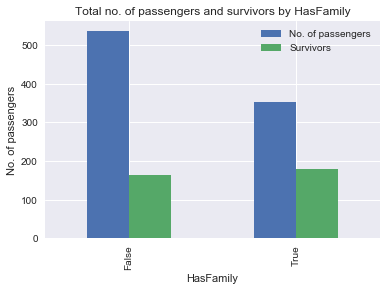

In [249]:
plot_with_labels(
    titanic.groupby(['HasFamily']).agg({'Survived': ['count', 'sum']}).plot(kind='bar'),
    xlabel='HasFamily',
    ylabel='No. of passengers',
    legend=['No. of passengers', 'Survivors'],
    title='Total no. of passengers and survivors by HasFamily'
)

A lot more people travelled without family. However:

1. The absolute number of survivors with family is slightly greater than the alone ones.
1. Although a greater proportion of family people survived, it is extremely curious that the absolute survivors in both groups are so close by.

### Conclusion

1. Yes, just statistically speaking, there's a positive correlation between being with family and surviving. Although we can't imply causality.

### What was the survival rate of people with children? What if you had a sibling?

We look deeper into the survival of people with families.

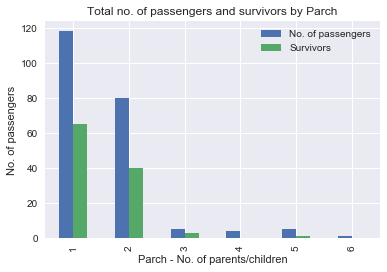

In [250]:
plot_with_labels(
    titanic[titanic['Parch'] > 0].groupby(['Parch']).agg({'Survived': ['count', 'sum']}).plot(kind='bar'),
    xlabel='Parch - No. of parents/children',
    ylabel='No. of passengers',
    legend=['No. of passengers', 'Survivors'],
    title='Total no. of passengers and survivors by Parch'
)

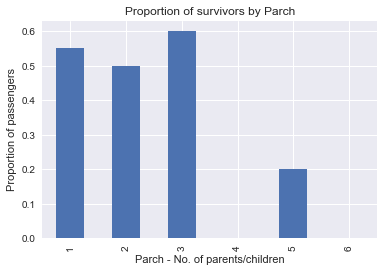

In [251]:
plot_with_labels(
    titanic[titanic['Parch'] > 0].groupby(['Parch']).agg({'Survived': ['mean']}).plot(kind='bar'),
    xlabel='Parch - No. of parents/children',
    ylabel='Proportion of passengers',
    legend='',
    title='Proportion of survivors by Parch'
)

#### Conclusion

1. Larger families (parent/children relationship) are negatively correlated with survival.

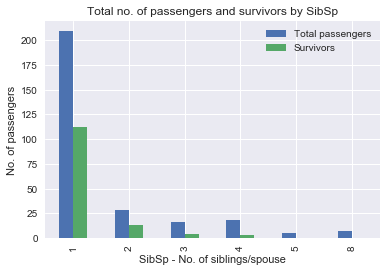

In [252]:
plot_with_labels(
    titanic[titanic['SibSp'] > 0].groupby(['SibSp']).agg({'Survived': ['count', 'sum']}).plot(kind='bar'),
    xlabel='SibSp - No. of siblings/spouse',
    ylabel='No. of passengers',
    legend=['Total passengers', 'Survivors'],
    title='Total no. of passengers and survivors by SibSp'
)

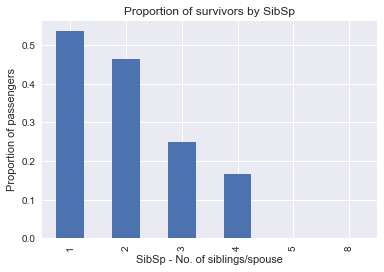

In [253]:
plot_with_labels(
    titanic[titanic['SibSp'] > 0].groupby(['SibSp']).agg({'Survived': ['mean']}).plot(kind='bar'),
    xlabel='SibSp - No. of siblings/spouse',
    ylabel='Proportion of passengers',
    legend='',
    title='Proportion of survivors by SibSp'
)

#### Conclusion

1. The survival rate has negative correlation with the number of siblings.

### Did female siblings survive more than male siblings?

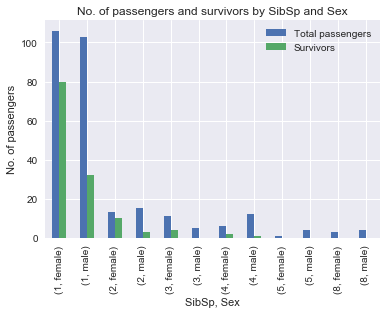

In [254]:
plot_with_labels(
    titanic[titanic['SibSp'] > 0].groupby(['SibSp', 'Sex']).agg({'Survived': ['count', 'sum']}).plot(kind='bar'),
    xlabel='SibSp, Sex',
    ylabel='No. of passengers',
    legend=['Total passengers', 'Survivors'],
    title='No. of passengers and survivors by SibSp and Sex'
)

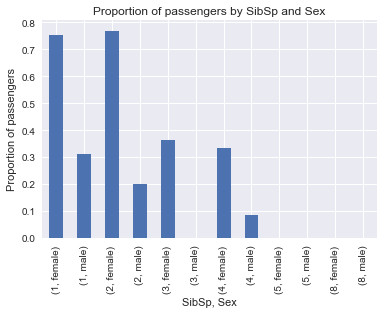

In [255]:
plot_with_labels(
    titanic[titanic['SibSp'] > 0].groupby(['SibSp', 'Sex']).agg({'Survived': ['mean']}).plot(kind='bar'),
    xlabel='SibSp, Sex',
    ylabel='Proportion of passengers',
    legend='',
    title='Proportion of passengers by SibSp and Sex'
)

#### Conclusion

1. Up to the size of 2 siblings, females have very high survival rate (above 0.75).
1. Even above 2 siblings, females survived a lot more than men.

## Final Conclusion

1. In conclusion, the survivors were predominantly females, and within females, the upper class females.
1. Males had lower and similar survival rates regardless of their class.
1. The survival rate also decreased as the number of siblings increased.
1. More members of family survived than alone individuals.
1. The proportion of upper class survivors were almost 63%, while non-upper class was just 30%. However, the absolute number of non-upper class survivors were greater.

### Limitations

#### Total no. of observations

1. The real titanic had about 1,317 passengers. Our dataset has 891 rows. About 426 observations are missing, and can provide more insight, or contradictory insights, to what we have gotten so far.
1. We are not sure how we got 891 observations from the total of 1317. We cannot assume that it's a random sample.

#### No. of children, No. of parents separetely

1. The dataset has a single variable `Parch` that gives the number of parents or number of children. However, it would have been useful to have them as separate variables.
1. The hypothesis is that children could normally be helper even at the parents' expense, and the segregation would have helped analyse the hypothesis.

#### Missing observations on Age

1. Age has about 177 missing observations. Depending on how these missing values are distributed, it can give us a sharper insight on age's correlation with survival than what we already have.
1. For example, those 177 missing values might be correlated to a specific class, age, or gender.